In [115]:
import numpy as np
import matplotlib.pyplot as plt


def integrate(x, a, b, res):
    N = int(max(1, (b - a) / res))
    interval = np.linspace(a, b, N + 1)
    step_size = (b - a) / N
    return step_size * np.sum(x(interval)) - 0.5 * (x(a) + x(b))

def ct_one_fd_convolve(x1, x2, t1, t2, res):
    @np.vectorize
    def y(t):
        @np.vectorize
        def integrand(tau):
            return x1(tau) * x2(t - tau)
        return integrate(integrand, t1, t2, res)
    return y

def ct_right_sided_convolve(x1, x2, t1, t2, res):
    """x1(t) = 0 when t < t1 and x2(t) = 0 when t < t2"""
    @np.vectorize
    def y(t):
        if t < t1 + t2:
            return 0.

        @np.vectorize
        def integrand(tau):
            return x1(tau) * x2(t - tau)
        
        return integrate(integrand, t1, t - t2, res)
    return y

def Shift(k, x):
    @np.vectorize
    def y(t):
        return x(t - k)
    return y
    
def u(t):
    if t >= 0:
        return 1.
    else:
        return 0.


In [116]:
# Problem 1
def gen_p(start, finish):
    @np.vectorize
    def p(t):
        if start <= t < finish:
            return 1.
        else:
            return 0.
    return p




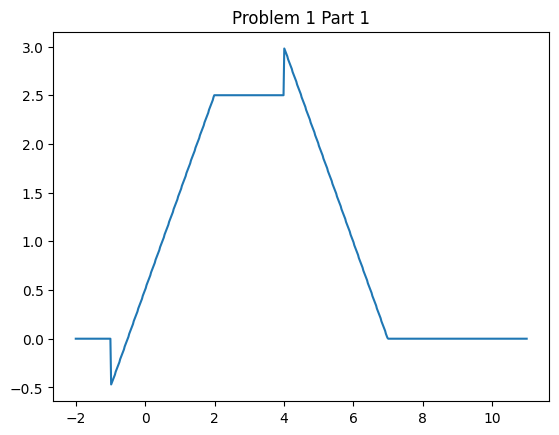

In [117]:
# Problem 1 (a) Part 1
p1 = gen_p(-1., 2.)
p2 = gen_p(0., 5.)

convolution = ct_one_fd_convolve(p1, p2, -1, 2, 0.01)

time_range = np.linspace(-2, 11, 600)

plt.plot(time_range, convolution(time_range))
plt.title("Problem 1 Part 1")
plt.show()

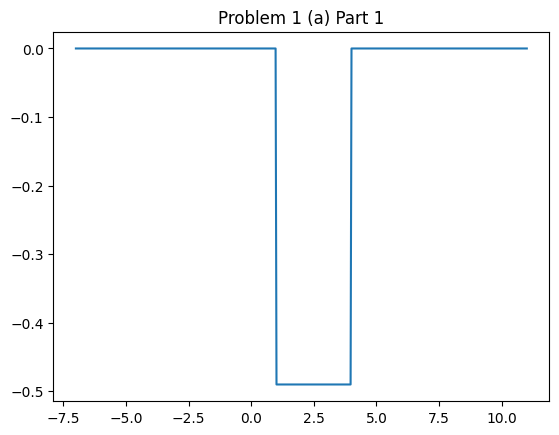

In [118]:
# Problem 1 (a) Part 2
x1 = Shift(2, u)
x2 = gen_p(-1., 2.)

convolution = ct_one_fd_convolve(x1, x2, -1., 2., 0.01)

time_range = np.linspace(-7, 11, 500)
# print(time_range)

plt.plot(time_range, convolution(time_range))
plt.title("Problem 1 (a) Part 1")
plt.show()



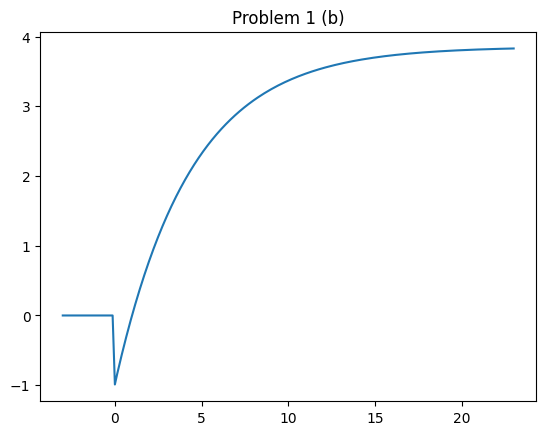

In [119]:
# Problem 1 (b)



@np.vectorize
def x2(t):
    return np.e ** (-0.23 * t) * u(t)

convolution = ct_right_sided_convolve(x2, u, 0., 0., 0.01)
time_range = np.linspace(-3, 23, 200)

plt.plot(time_range, convolution(time_range))
plt.title("Problem 1 (b)")
plt.show()



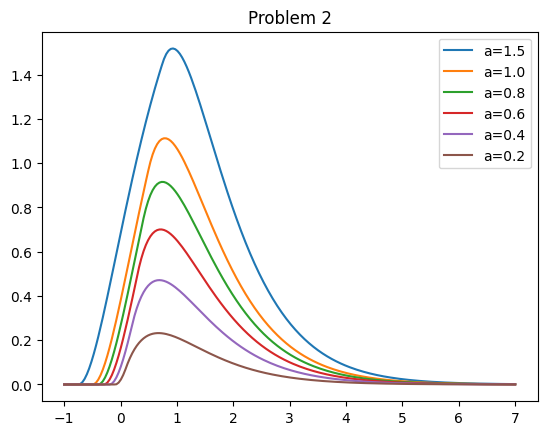

In [120]:
# Problem 2
def p(a):
    @np.vectorize
    def pa(t):
        if -a/2 < t < a/2:
            return 1.
        return 0
    return pa


def h(t):
    return 5 * t * np.e ** (-1.5 * t) * u(t)

time_range = np.linspace(-1, 7, 200)
for i in [0.75, 0.5, 0.4, 0.3, 0.2, 0.1]:
    a = i * 2
    convolution = ct_one_fd_convolve(p(a), h, -i, i, 0.01)
    plt.plot(time_range, convolution(time_range), label=f"a={a}")
plt.title("Problem 2")
plt.legend()
plt.show()
    
    
    

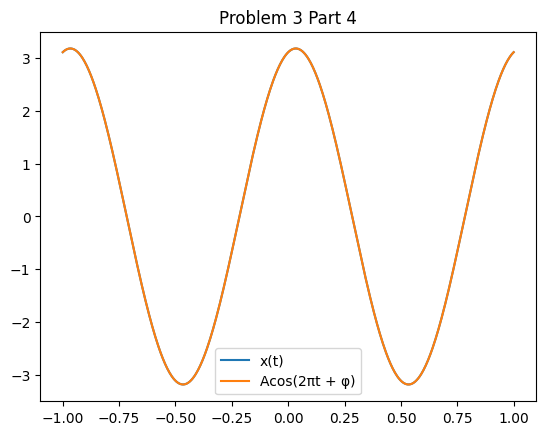

In [127]:
# Problem 3
# Problem 3 Part 1
cos, pi = np.cos, np.pi

@np.vectorize
def x1(t):
    return 3 * cos(2*pi*t - pi/4)

@np.vectorize
def x2(t):
    return 2 * cos(2*pi*t + pi/7)

@np.vectorize
def x3(t):
    return -cos(2*pi*t - pi/5)

@np.vectorize
def x(t):
    return x1(t) + x2(t) + x3(t)

# Problem 3 Part 2
e = np.e
X1 = 3 * e**(1j * -pi/4)
X2 = 2 * e**(1j * pi/7)
X3 = 1 * e**(1j * 4*pi/5)

# Problem 3 Part 3
X = X1 + X2 + X3
A = abs(X)
theta = np.arctan2(np.imag(X), np.real(X))

# Problem 3 Part 4
time_range = np.linspace(-1, 1, 601)
def other_x(t):
    return A * cos(2*pi*t + theta)

plt.plot(time_range, x(time_range), label="x(t)")
plt.plot(time_range, other_x(time_range), label="Acos(2πt + φ)")
plt.legend()
plt.title("Problem 3 Part 4")
plt.show()



In [156]:
# Problem 3 Part 5
time_range = np.linspace(-.5, .5, 601)
y = x(time_range)
A_emp = np.max(y)

theta_emp = time_range[np.argmax(y)] * (-2*pi)

print(f"X_emp    = {A_emp * e**(1j * theta_emp)}")
print(f"X_theory = {X}")



X_emp    = (3.1150169830894665-0.6621172994692223j)
X_theory = (3.1142410849895334-0.665767613032053j)


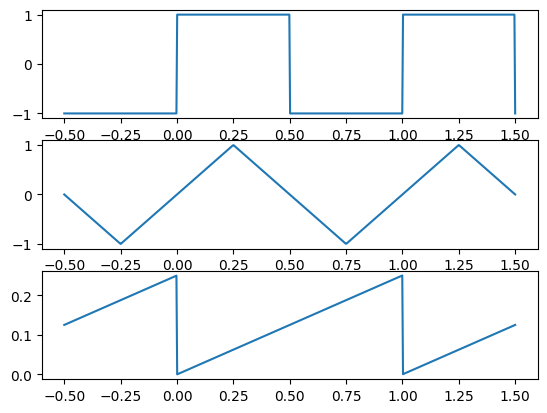

In [92]:
# Problem 4 Part 1
time_range = np.linspace(-0.5, 1.5, 600)

@np.vectorize()
def square(t):
    if t % 1 < 0.5:
        return 1.
    else:
        return -1.

@np.vectorize()
def triangle(t):
    t += 0.25
    t %= 1
    if t < 0.5:
        return -1 + 4*t
    else:
        return 3 - 4*t

@np.vectorize()
def sawtooth(t):
    t %= 1
    return t/4

plt.subplot(3, 1, 1)
plt.plot(time_range, square(time_range))

plt.subplot(3, 1, 2)
plt.plot(time_range, triangle(time_range))

plt.subplot(3, 1, 3)
plt.plot(time_range, sawtooth(time_range))

plt.show()





q(1/3) = 0.0


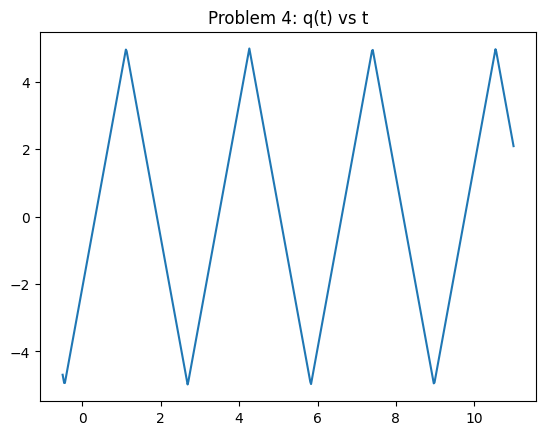

In [113]:
# Problem 4 Part 2
@np.vectorize
def q(t):
    return 5 * triangle((t - 1/3)/pi)

print(f"q(1/3) = {q(1/3)}")
time_range = np.linspace(-0.5, 11, 600)
plt.title("Problem 4: q(t) vs t")
plt.plot(time_range, q(time_range))
plt.show()